In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


import matplotlib.pyplot as plt
import numpy as np

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


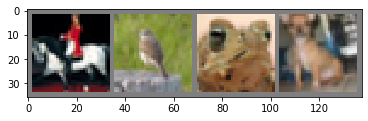

horse  bird  frog   dog


In [4]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [106]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 7, 4)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(7, 20, 4)
        self.fc1 = nn.Linear(20 * 6 * 6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        print(x.size())
        x = self.pool(F.relu(self.conv2(x)))
        print()
        x = x.view(-1, 20 * 6 * 6)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cpu')
print("Using ", device)
# model = Edge_Class_Net( input_dim=2, hidden_dim=64, n_graph_iters=4).to(device)
model = Net().to(device)

Using  cpu


In [107]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [110]:
for data in trainloader:
    print(data)

[tensor([[[[-0.3098, -0.2157, -0.1216,  ..., -0.3961, -0.6078, -0.4902],
          [-0.2863, -0.2157, -0.1216,  ..., -0.4667, -0.4745, -0.4118],
          [-0.2941, -0.2314, -0.1216,  ..., -0.6314, -0.4667, -0.4588],
          ...,
          [-0.4588, -0.5216, -0.5216,  ..., -0.5922, -0.6157, -0.6471],
          [-0.4353, -0.4980, -0.5137,  ..., -0.6314, -0.6627, -0.6784],
          [-0.4980, -0.5059, -0.5216,  ..., -0.6627, -0.6784, -0.6627]],

         [[-0.1843, -0.1059, -0.0353,  ..., -0.1216, -0.3569, -0.2627],
          [-0.1686, -0.1137, -0.0275,  ..., -0.2000, -0.2471, -0.2078],
          [-0.1765, -0.1294, -0.0353,  ..., -0.4039, -0.2784, -0.3098],
          ...,
          [-0.2314, -0.2941, -0.2863,  ..., -0.3569, -0.3804, -0.4039],
          [-0.2078, -0.2627, -0.2784,  ..., -0.4039, -0.4275, -0.4431],
          [-0.2706, -0.2706, -0.2863,  ..., -0.4353, -0.4588, -0.4275]],

         [[-0.1373, -0.0431,  0.0431,  ..., -0.0902, -0.3020, -0.2314],
          [-0.0745, -0.0353, 

KeyboardInterrupt: 

In [108]:
for epoch in range(2):  # loop over the dataset multiple times

    model.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
                
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # send the data to the GPU
        inputs, labels = data[0].to(device), data[1].to(device)
        
        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
        
    model.eval()
    correct, total = 0, 0
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))
        
print('Finished Training')

torch.Size([4, 7, 14, 14])
torch.Size([4, 20, 5, 5])


RuntimeError: shape '[-1, 720]' is invalid for input of size 2000

In [48]:
PATH = './cifar_net.pth'
torch.save(model.state_dict(), PATH)

In [109]:
torch.ceil(7/2)

TypeError: ceil(): argument 'input' (position 1) must be Tensor, not float